### 获取数据

In [10]:
import os
import tarfile
from six.moves import urllib

In [11]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [63]:
import pandas as pd

In [64]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [110]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


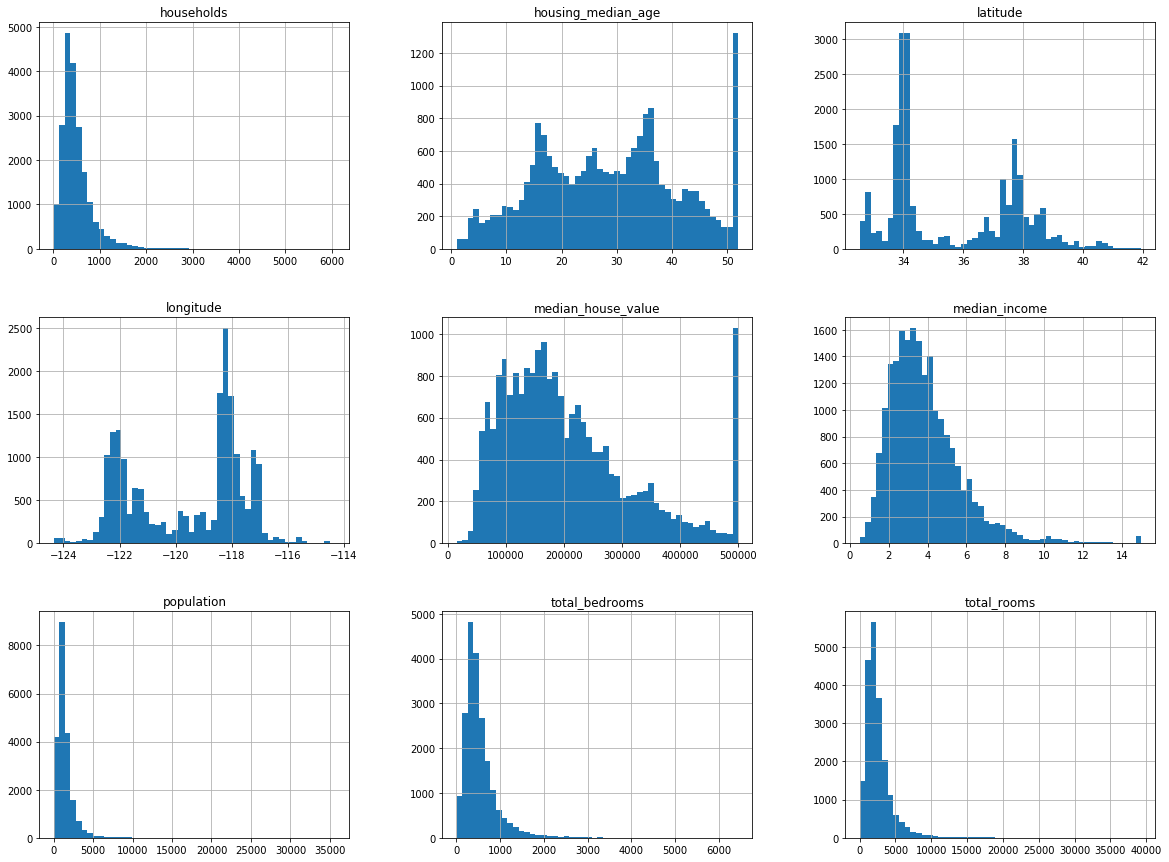

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [66]:
import numpy as np

In [67]:
def split_train_test(data,test_ratio):   #自己编写函数划分训练集和测试集（第一种方法随机抽样）
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [68]:
train_set,test_set = split_train_test(housing,0.2)
print(len(train_set),"trian+",len(test_set),"test")

16512 trian+ 4128 test


In [104]:
import hashlib  #使用哈希值来使训练集划分具有唯一性（第二种方法）
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [105]:
housing_with_id = housing.reset_index() # 使用行索引生成一个唯一的ID
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [111]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]   # 使用长、宽生成一个唯一的ID
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [119]:
print(len(train_set),"trian+",len(test_set),"test")

13134 trian+ 3378 test


In [121]:
from sklearn.model_selection import train_test_split     #（第三种方法，sklearn内置函数，与第一种类似）
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)    #random_state设置随机生成器种子

In [122]:
print(len(train_set),"trian+",len(test_set),"test")

16512 trian+ 4128 test


In [131]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)  # 以1.5为界进行分层抽样，np.ceil取整
housing['income_cat'].where(housing["income_cat"] < 5,5.0,inplace=True) #所有大于5的都取5

In [134]:
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit  #进行分层

In [135]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [137]:
print(len(strat_train_set),"trian+",len(strat_test_set),"test")

16512 trian+ 4128 test


In [136]:
housing["income_cat"].value_counts()/len(housing)   #各层占的百分比

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [138]:
for set in (strat_train_set,strat_test_set):       #删掉income_cat，回到原始状态
    set.drop(["income_cat"],axis=1,inplace=True)

### 数据探索与可视化、发现规律

In [140]:
housing = strat_train_set.copy()    #产生原始集合的复制版

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt 

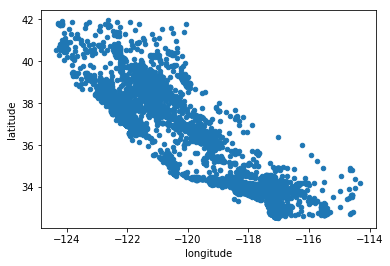

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")

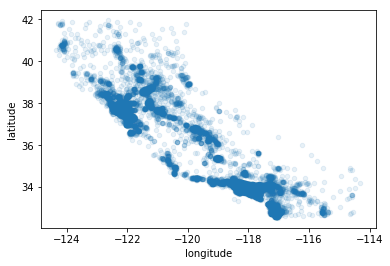

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

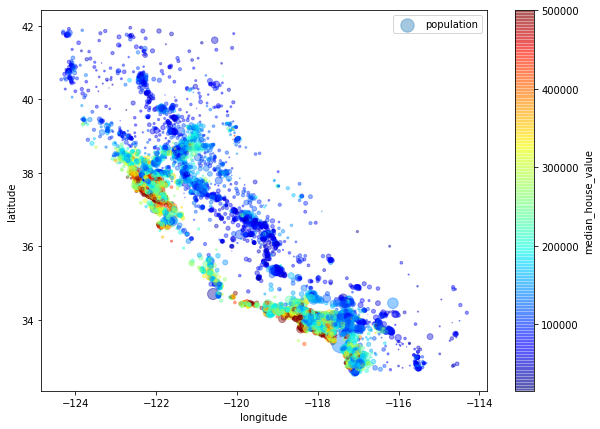

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [28]:
from pandas.tools.plotting import scatter_matrix

In [29]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

d:\python3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B6DDB38>,
      dtype=object)

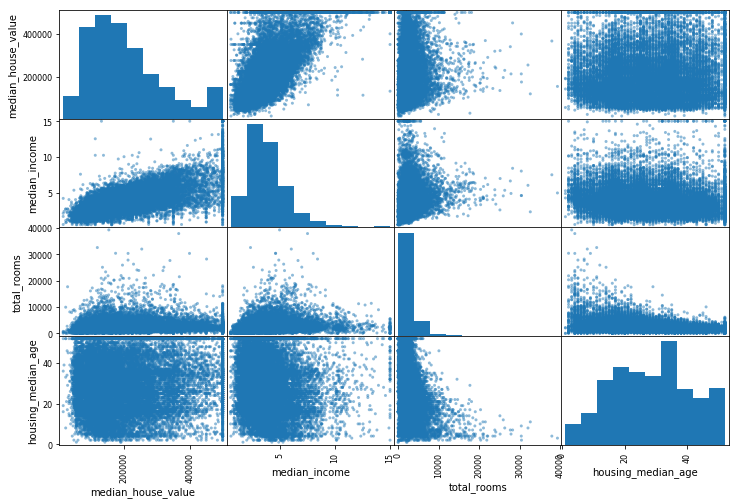

In [32]:
scatter_matrix(housing[attributes],figsize=(12,8))

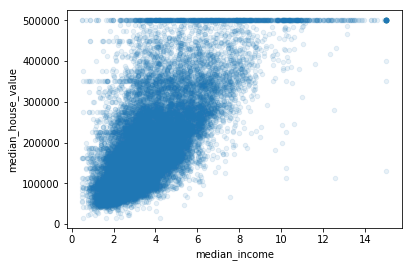

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

### 为机器学习算法准备数据

In [162]:
housing = strat_train_set.copy()    #产生原始集合的复制集合
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [170]:
housing = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [143]:
median = housing["total_bedrooms"].median()    #处理缺失值  第一种方法
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [171]:
from sklearn.preprocessing import Imputer   #处理缺失值  第二种方法,sklearn内置函数
imputer = Imputer(strategy="median")        #创建一个插补器实例，使用中位值

d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [172]:
housing_num = housing.drop("ocean_proximity",axis = 1)   #再次剔除非数值特征，训练集

In [173]:
imputer.fit(housing_num)    #训练出中位值

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [174]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [175]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [176]:
X = imputer.transform(housing_num)  #使用已被训练的插补器转换数据集，即中位值代替缺失值,  numpy数组格式

In [177]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)   #转换回DataFrame数据框的格式
housing_tr.shape

(16512, 8)

#### 处理文本和类别属性

In [178]:
from sklearn.preprocessing import LabelEncoder     #第一种方法：文本---整数类---类向量
encoder = LabelEncoder()

In [180]:
housing_cat = housing["ocean_proximity"]

In [181]:
housing_cat_encoded = encoder.fit_transform(housing_cat)  #用同一列表示
housing_cat_encoded[:200]

array([0, 0, 4, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4,
       4, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 3, 3, 3, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 4, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 4, 1, 0, 3, 0, 0, 3, 0, 1, 3, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 1, 4, 0, 1,
       0, 1, 0, 4, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 3, 0, 0,
       0, 0, 4, 0, 1, 4, 3, 1, 0, 0, 4, 1, 1, 4, 0, 4, 3, 0, 1, 1, 4, 1,
       1, 0, 0, 1, 1, 3, 0, 1, 3, 0, 1, 0, 4, 1, 0, 0, 1, 0, 0, 3, 1, 1,
       3, 0])

In [44]:
print(encoder.classes_)  #对应四类文本

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [187]:
from sklearn.preprocessing import OneHotEncoder  #用不同列表示特征，每个类别创建一个二进制属性
encoder = OneHotEncoder()

In [189]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.shape

d:\python3.5\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(16512, 5)

In [54]:
housing_cat_1hot.toarray()[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [196]:
from sklearn.preprocessing import LabelBinarizer   #第二种方法，直接转换成热向量
encoder = LabelBinarizer()

In [197]:
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### 自定义转换器（transformers）

In [198]:
from sklearn.base import BaseEstimator, TransformerMixin

In [199]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [230]:
class CombinedAttributesAdder(object):
    def _int_(self, add_bedrooms_per_room):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if True:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]  

In [231]:
attr_adder = CombinedAttributesAdder()

In [232]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [233]:
housing.values.shape

(16512, 9)

In [234]:
housing_extra_attribs.shape

(16512, 12)

### 特征缩放（正交化，标准化）

### 变换管道

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [236]:
num_pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())
                        ])

d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [237]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr .shape

(16512, 11)

In [238]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [241]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [248]:
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('label_binarizer', LabelBinarizerPipelineFriendly())])
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)])

d:\python3.5\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [255]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

### 选择并训练模型

#### 训练集的训练和评估

In [256]:
from sklearn.linear_model import LinearRegression      #线性模型
lin_reg = LinearRegression()

In [258]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
some_data = housing.iloc[:5]

In [260]:
some_labels =housing_labels.iloc[:5]

In [264]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared.shape

(5, 16)

In [265]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [266]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


##### 尝试决策树模型

In [267]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [269]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [270]:
housing_predictions = tree_reg.predict(housing_prepared)

In [271]:
from sklearn.metrics import mean_squared_error

In [272]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [273]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 使用交叉验证更好的估计

In [275]:
from sklearn.model_selection import cross_val_score    # K折交叉验证

In [281]:
scores = cross_val_score(tree_reg,housing_prepared,
                         housing_labels,scoring="neg_mean_squared_error",cv=10) #计算模型的得分 

In [280]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([68440.65485218, 66303.95399811, 70914.67960045, 67617.50005129,
       69590.4355408 , 74200.09718793, 71761.83195249, 71678.75866848,
       76222.22500385, 70647.97976923])

In [283]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation",scores.std())

In [285]:
display_scores(rmse_scores)

Scores: [68440.65485218 66303.95399811 70914.67960045 67617.50005129
 69590.4355408  74200.09718793 71761.83195249 71678.75866848
 76222.22500385 70647.97976923]
Mean: 70737.81166247962
Standard deviation 2828.9291495577495


In [297]:
lin_scores = cross_val_score(lin_reg,housing_prepared,    #现在看线性回归的交叉验证值
            housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation 2731.6740017983425


In [288]:
from sklearn.ensemble import RandomForestRegressor   #采用随机森林模型
forest_reg = RandomForestRegressor()

In [289]:
forest_reg.fit(housing_prepared,housing_labels)

d:\python3.5\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [295]:
housing_predictions = forest_reg.predict(housing_prepared)  #计算RMSE
forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse= np.sqrt(forest_mse)
forest_rmse

22102.0599001485

In [296]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,  #计算分数
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52602.55369304 50507.52319632 52376.60640548 54162.97553258
 52364.1322518  54988.45570785 50536.14316499 50583.08294851
 55651.50439121 51626.40630334]
Mean: 52539.938359513646
Standard deviation 1765.8586106763291


### 调整你的模型

#### Grid Search（地毯式搜索）  改变超参数的值

In [298]:
from sklearn.model_selection import GridSearchCV

In [300]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [301]:
forest_reg = RandomForestRegressor()

In [302]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error')  #cv表示多少折

In [303]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 3, 4], 'n_estimators': [3, 10], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [304]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [305]:
grid_search.best_estimator_   #直接查看最好的估计器

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [306]:
cvres = grid_search.cv_results_     #查看估计的分数，越小越好
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63841.36855686086 {'max_features': 2, 'n_estimators': 3}
55496.27773240678 {'max_features': 2, 'n_estimators': 10}
53086.301817636784 {'max_features': 2, 'n_estimators': 30}
59667.803787123696 {'max_features': 4, 'n_estimators': 3}
53146.25656751017 {'max_features': 4, 'n_estimators': 10}
50244.70193730412 {'max_features': 4, 'n_estimators': 30}
59117.832937340805 {'max_features': 6, 'n_estimators': 3}
51957.645583794816 {'max_features': 6, 'n_estimators': 10}
49923.542072656564 {'max_features': 6, 'n_estimators': 30}
58613.53018982095 {'max_features': 8, 'n_estimators': 3}
52248.13805403823 {'max_features': 8, 'n_estimators': 10}
50023.94749156651 {'max_features': 8, 'n_estimators': 30}
62745.52521901338 {'max_features': 2, 'n_estimators': 3, 'bootstrap': False}
54836.48212963268 {'max_features': 2, 'n_estimators': 10, 'bootstrap': False}
60942.14811873666 {'max_features': 3, 'n_estimators': 3, 'bootstrap': False}
52622.10479392963 {'max_features': 3, 'n_estimators': 10, 'bootstrap': 

#### Randomized Search（随机搜索GridSearchCV）

#### 组合方法

#### 分析最佳模型及其错误

###### 在它们对应的属性名旁边显示这些重要性分数。

In [307]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.92202481e-02, 7.37385401e-02, 3.89384178e-02, 1.73089856e-02,
       1.64775703e-02, 1.82020574e-02, 1.53465615e-02, 3.08555891e-01,
       7.55218327e-02, 1.09190072e-01, 7.25887157e-02, 1.38697867e-02,
       1.54404521e-01, 4.59939747e-05, 1.96752117e-03, 4.62328543e-03])

In [308]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [309]:
sorted(zip(feature_importances,attributes),reverse = True)

[(0.3085558907176427, 'median_income'),
 (0.15440452099904228, 'INLAND'),
 (0.10919007182389703, 'pop_per_hhold'),
 (0.07922024813295994, 'longitude'),
 (0.07552183270831679, 'rooms_per_hhold'),
 (0.0737385400855292, 'latitude'),
 (0.07258871568893398, 'bedrooms_per_room'),
 (0.03893841777842651, 'housing_median_age'),
 (0.018202057424011504, 'population'),
 (0.0173089856399256, 'total_rooms'),
 (0.016477570271704805, 'total_bedrooms'),
 (0.01534656148278627, 'households'),
 (0.013869786675346458, '<1H OCEAN'),
 (0.004623285428314766, 'NEAR OCEAN'),
 (0.001967521168464231, 'NEAR BAY'),
 (4.5993974697852044e-05, 'ISLAND')]

### 在测试集中评估您的系统

In [313]:
final_model = grid_search.best_estimator_

In [327]:
x_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set["median_house_value"].copy()

In [315]:
x_test_prepared = full_pipeline.transform(x_test)

In [329]:
final_predictions = final_model.predict(x_test_prepared)

In [331]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47344.22647367956

### 启动、监视和维护系统